# OBESITY RISK DATA ANALYSIS

## About Dataset

This dataset includes information for estimating obesity levels in individuals from Mexico, Peru, and Colombia, based on their dietary habits and physical condition. The data contains 17 attributes and 2111 records, which are labeled with the class variable NObesity (Obesity Level), allowing classification using the values Underweight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. 77% of the data was synthetically generated using the Weka tool and the SMOTE filter, while 23% of the data was collected directly from users through a web platform.

## Objective

The purpose of this Notebook is to explore and understand the data, as well as to develop a classification algorithm to determine the Obesity Level. Based on the information provided by the interviewee, this algorithm will allow us to assess their health in relation to body fat.

## Importing Libraries

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings

## Importing Data

In [7]:
df = pd.read_csv("D:\Obesity DataSet_raw_and_data_sinthetic.csv")

In [8]:
display(df.head(5))
print(df.shape)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


(2111, 17)


## Data Cleaning

In [9]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Age,float64,1402,0
Gender,object,2,0
Height,float64,1574,0
Weight,float64,1525,0
CALC,object,4,0
FAVC,object,2,0
FCVC,float64,810,0
NCP,float64,635,0
SCC,object,2,0
SMOKE,object,2,0


In [10]:
#Organic Data
df_organic = df.head(498)

#Synthetic Data
df_synthetic = df.iloc[498:]

display(df_organic.tail(3))
display(df_synthetic.head(3))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
495,19.0,Male,1.80,60.0,no,yes,3.0,1.0,yes,no,1.0,yes,0.0,0.0,Always,Motorbike,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
497,20.0,Male,1.56,45.0,Sometimes,no,2.0,3.0,no,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
498,25.196214,Female,1.686306,104.572712,Sometimes,yes,3.0,3.0,no,no,1.152736,yes,0.319156,1.00000,Sometimes,Public_Transportation,Obesity_Type_III
499,18.503343,Female,1.683124,126.673780,Sometimes,yes,3.0,3.0,no,no,1.115967,yes,1.541072,1.00000,Sometimes,Public_Transportation,Obesity_Type_III
500,26.000000,Female,1.622397,110.792630,Sometimes,yes,3.0,3.0,no,no,2.704507,yes,0.000000,0.29499,Sometimes,Public_Transportation,Obesity_Type_III


Organic data is contained from the first row up to row 498, whereas synthetic data is located from the subsequent row until the end

*
Comparing the unique values allows us to visualize the difference between the two types of data:

In [11]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique_Organic'] = df_organic.nunique().values
df_info['Unique_Synthetic'] = df_synthetic.nunique().values
df_info

,Dtype,Unique_Organic,Unique_Synthetic
Age,float64,35,1381
Gender,object,2,2
Height,float64,47,1540
Weight,float64,91,1452
CALC,object,4,3
FAVC,object,2,2
FCVC,float64,3,810
NCP,float64,3,635
SCC,object,2,2
SMOKE,object,2,2


We can notice the discrepancy between the types of data in the columns FCVC, NCP, CH2O, FAF, and TUE. While in the organic data, the number of unique values matches the number of available options, in the synthetic data, this variation ranges from 635 to 1268 unique values.

Now, I will make slight adjustments to ensure the data maintains a certain standar



In [12]:
#Converting the "Age" column to integer
df['Age'] = df['Age'].astype(int)

#Float Columns
colunas_float = ['Height', 'Weight','NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Round the float columns to two decimal places
df[colunas_float] = df[colunas_float].round(2)

## Duplicated Records

In [13]:
# Checking for duplicate values
df.duplicated().sum()

24

There are 24 duplicate records, but could they be cases of multiple entries for the same person? Without an ID or name of the interviewee, we cannot answer this question with certainty.

Given that there are only 24 out of 2111 records, I will choose to exclude them. However, in a real-life scenario, it would be worth investigating these records more thoroughly.

In [14]:
# Creating a new DataFrame containing only the duplicate rows
duplicated_df = df.loc[df.duplicated(keep=False), :]
duplicated_df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
105,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,25,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,21,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [15]:
# Droping duplicates
df = df.drop_duplicates()
df.shape

(2087, 17)

## DataFrame Describe

In [16]:
# Df Describe 
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00,2087.00
mean,24.01,1.70,86.86,2.42,2.70,2.00,1.01,0.66
std,6.33,0.09,26.19,0.53,0.76,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.00,1.63,66.00,2.00,2.70,1.59,0.12,0.00
50%,22.00,1.70,83.10,2.40,3.00,2.00,1.00,0.63
75%,26.00,1.77,108.02,3.00,3.00,2.46,1.68,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


## Creating New Features

One new column will be created containing the BMI.
Body Mass Index - BMI

The Body Mass Index (BMI) is a measure used to assess whether a person has a healthy weight in relation to their height. It is calculated by dividing weight (in kilograms) by height squared (in meters).

In [18]:
# Calculate the Body Mass Index (BMI)
df['BMI'] = round(df['Weight'] / (df['Height']) ** 2, 2)
df.head(1)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI
0,21,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,24.39


## EDA

The exploratory data analysis will be divided into two parts:

In the first part, the features will be divided between categorical and numerical, and plotted separately to provide an overall picture.

In the second part, the data will be analyzed based on the classes of the 'NObeyesdad' feature, showing how different weight classifications behave in relation to the other features.

In [19]:
### Colors
color1 = '#8BD5EA' # Light Blue
color2 = '#02231C' # Dark Green
color3 = '#8A55A2' # Pink
color4 = '#5854A3' # Purple
color5 = '#2D5653' # Dark Green
colorbg ='#C7F6EC' # Super Light Green


# Palettes
color_palette_cat = [color1, color2, color3, color4, color5]
color_palette_num = [color1, color2, color3, color4, color5]
color_palette_cluster = [color1, color3, color5, color2, color4]


# Define the background style and colors of the chart elements.
sns.set(rc={"axes.facecolor": colorbg, "figure.facecolor": colorbg, "axes.labelcolor": color2, "xtick.color": color2, "ytick.color": color2, "text.color": color2})


# Plot categorical features
def plot_categorical_features(df, color, num_cols=3):
    categorical_features = df.select_dtypes(exclude="number").columns
    
    num_rows = len(categorical_features) // num_cols + (len(categorical_features) % num_cols > 0)
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 7), tight_layout=True)
    
    for ax, feature in zip(axs.flatten(), categorical_features):
        ordered_categories = df[feature].value_counts().index
        
        sns.countplot(x=feature, ax=ax, data=df, order=ordered_categories, color=color, linewidth=0)
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
        
        ax.set_title(feature)
        
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        ax.grid(False)
        
        for spine in ax.spines.values():
            spine.set_color(color)
    
    plt.show()

    
def plot_numerical_features(df, color_hist=color2, color_box=color2):
    numerical_features = df.select_dtypes(include="number").columns

    num_rows = len(numerical_features) // 2 + (len(numerical_features) % 2 > 0)

    fig = plt.figure(figsize=(25, 20), tight_layout=True)
    gs = gridspec.GridSpec(num_rows, 4, width_ratios=[2, 2, 2, 2], wspace=0.1, hspace=0.5)

    for i, feature in enumerate(numerical_features):
        row = i // 2
        col = (i % 2) * 2

        ax0 = plt.subplot(gs[row, col])
        ax1 = plt.subplot(gs[row, col + 1])
        
        sns.histplot(x=feature, kde=True, data=df, color=color_hist, ax=ax0)
        sns.boxplot(x=feature, data=df, color=color_box, ax=ax1)

        ax0.set_title(feature)

        ax0.set_xlabel('')
        ax0.set_ylabel('')

        ax0.grid(False)

        for spine in ax0.spines.values():
            spine.set_color(color2)

    plt.show()  
    
    
    
def plot_categorical_features_target(df, target_column='NObeyesdad', num_cols=3, color_palette=None):
    categorical_features = df.select_dtypes(exclude="number").columns
    num_rows = len(categorical_features) // num_cols + (len(categorical_features) % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    for i, feature in enumerate(categorical_features):
        row = i // num_cols
        col = i % num_cols
        grouped = df.groupby([target_column, feature]).size().unstack()
        color_palette = color_palette if color_palette else plt.get_cmap('Set3')(range(len(grouped.columns)))
        grouped.plot(kind='bar', stacked=True, ax=axes[row, col], color=color_palette)
        axes[row, col].set_title('{} X {}'.format(feature, target_column))
        axes[row, col].set_xlabel(target_column)
        axes[row, col].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

    plt.tight_layout()
    plt.show()    
    
    
def plot_numerical_features_target(df, target_column='NObeyesdad', num_cols=2, color_palette=None):
    numerical_features = df.select_dtypes(include="number").columns
    num_rows = len(numerical_features) // num_cols + (len(numerical_features) % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    

    if color_palette:
        colors = color_palette
    else:
        colors = sns.color_palette() 
    
    for i, feature in enumerate(numerical_features):
        row = i // num_cols
        col = i % num_cols
        for idx, category in enumerate(df[target_column].unique()):
            sns.kdeplot(data=df[df[target_column] == category], x=feature, fill=True, common_norm=False, color=colors[idx], ax=axes[row, col], label=category)
        axes[row, col].set_title('{} Density for Obesity Level'.format(feature))
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Density')
        axes[row, col].legend()
        axes[row, col].grid(False)

    plt.tight_layout()
    plt.show()

## Categorical Columns

Overview of Categorical Features

C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

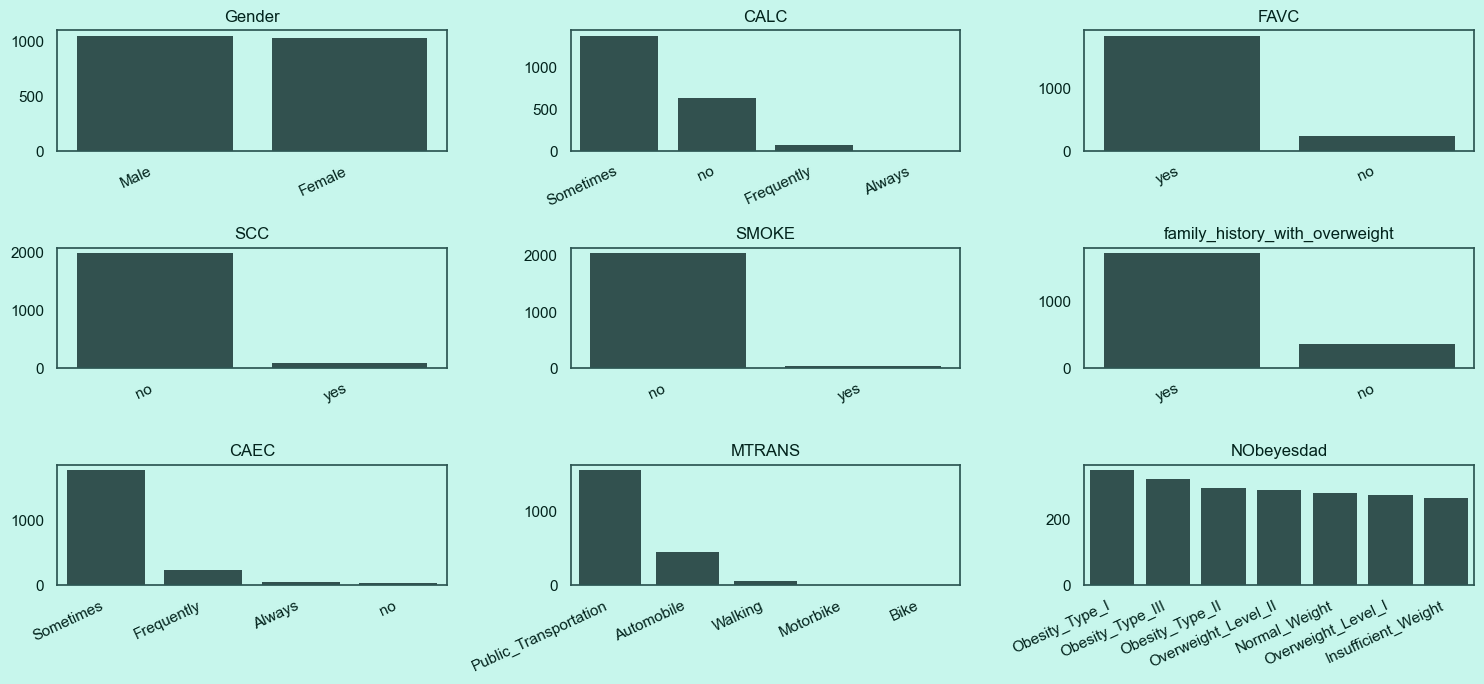

In [20]:
# Plot categorical features graphs
plot_categorical_features(df, color5)

## Numerical Columns

Overview of numerical features

Through the table describing each feature in the context section, we understand that the numerical values in the columns FCVC, NCP, CH2O, FAF, and TUE represent response options for their associated questions. For instance, in the CH2O column representing daily water consumption, values range from 1.0 to 3.0. However, practically, these values correspond to less than 1 liter, between 1 and 2 liters, and more than 2 liters, respectively. It's evident that the visualization of these columns in graphs below lacks intuitiveness:

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


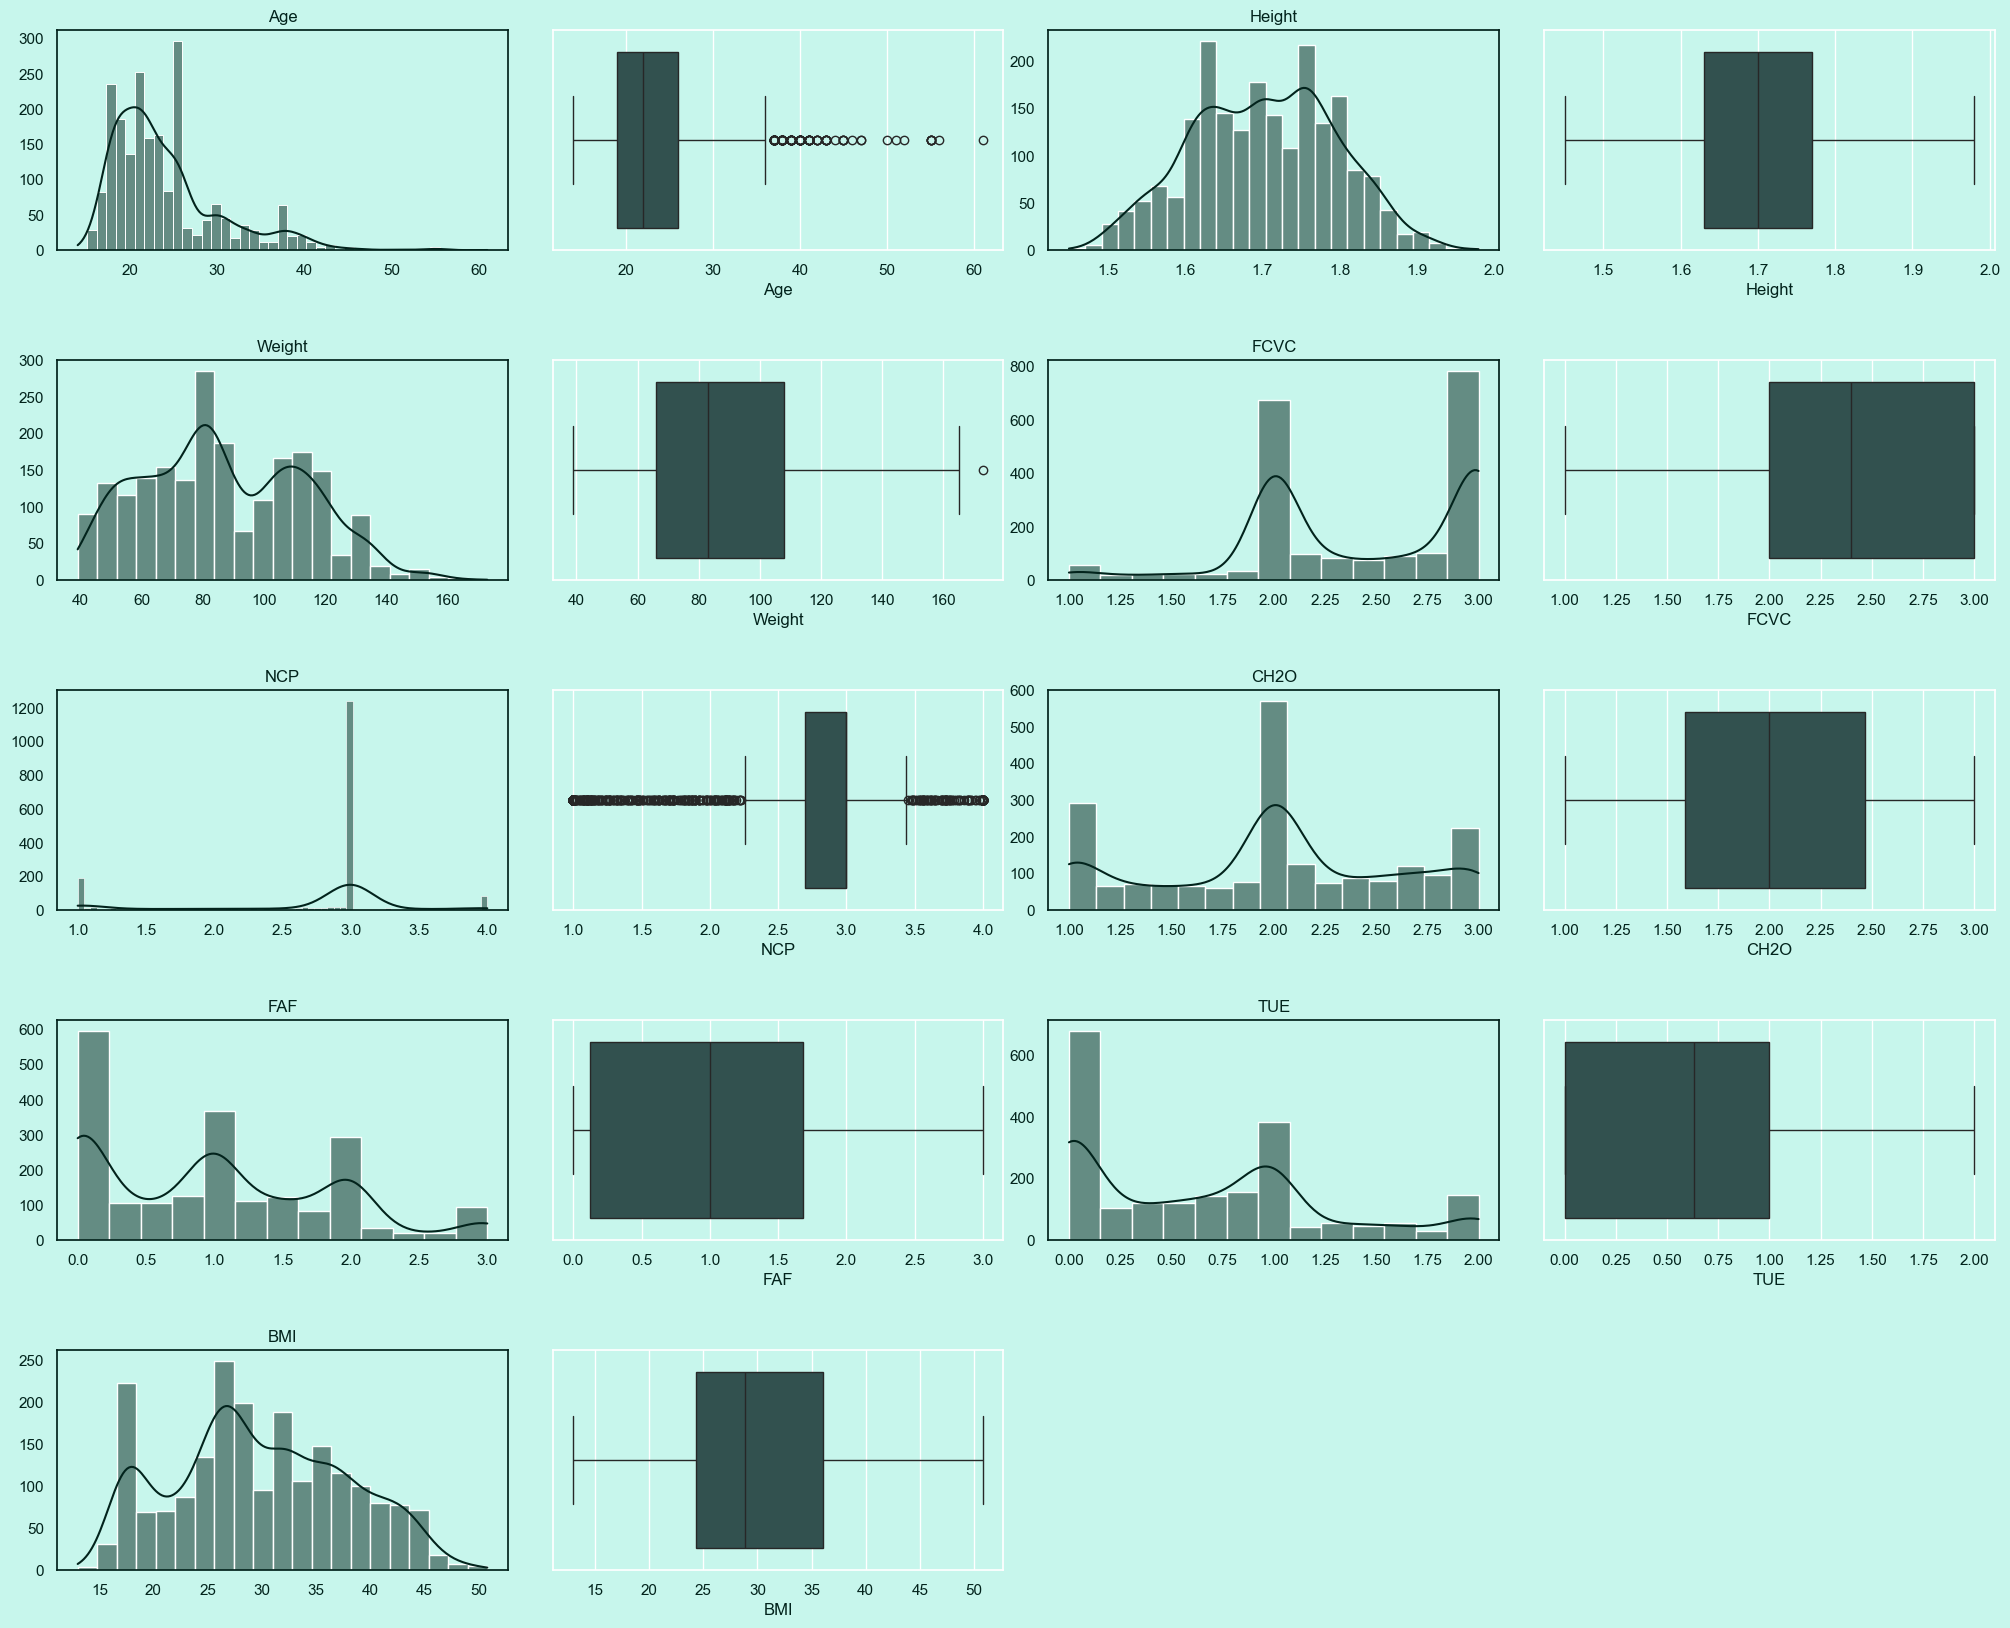

In [21]:
plot_numerical_features(df, color_hist=color2, color_box=color5)

To enhance the visualization and understanding of the graphs, I will make two important changes:

Firstly, I will replace the numerical values in the graphs with the corresponding response options from the questionnaire.

Secondly, I will adjust the titles to make them more comprehensible and descriptive. These modifications aim to facilitate the interpretation of the presented data and make the analysis more accessible.

C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_22796\209468652.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

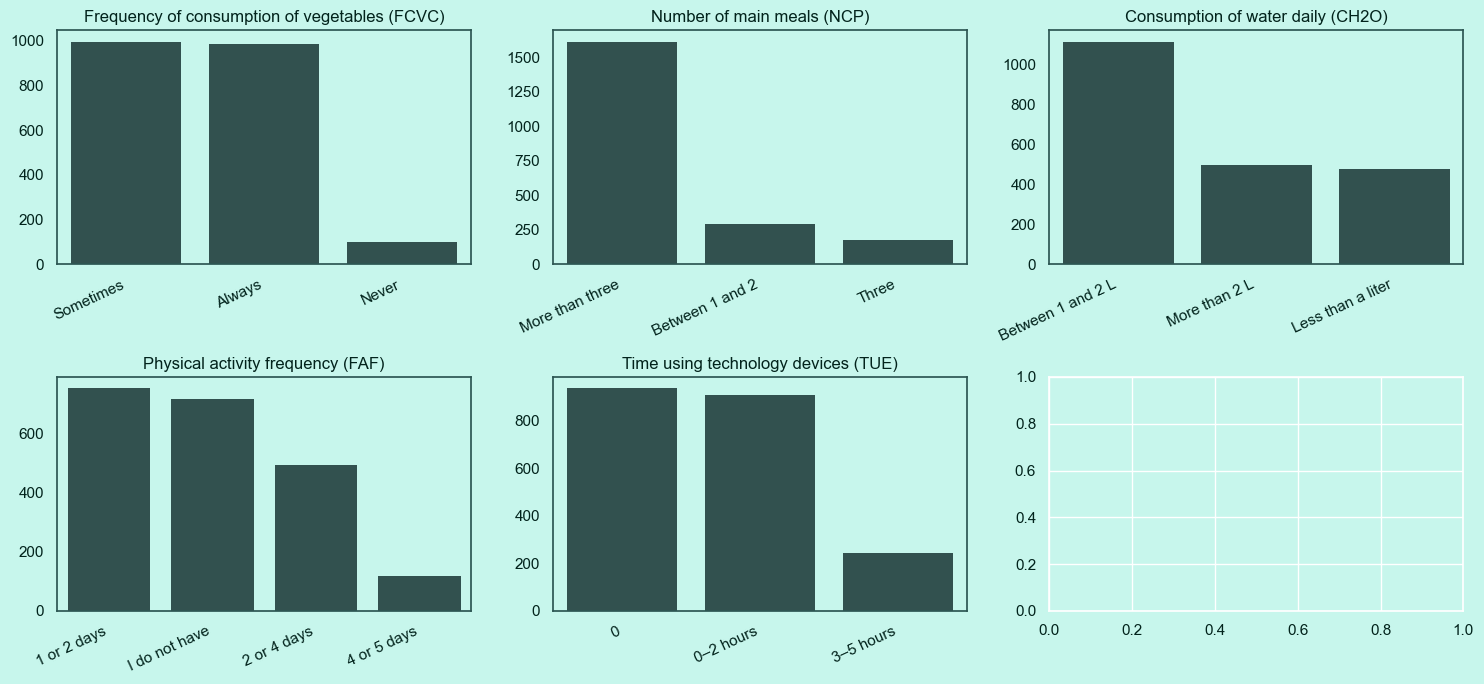

In [22]:
from itertools import islice

# Create a copy of the original DataFrame
df_visu = df.copy()

# List of columns to be converted
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Iterate over each column and make the changes
for column in columns:
    df_visu[column] = df_visu[column].round().astype(int)
    
# Mapping of values for the columns
mapping = {
    'NCP': {
        '1': 'Between 1 and 2',
        '2': 'Three',
        '3': 'More than three',
        '4': 'More than three'
    },
    'CH2O': {
        '1': 'Less than a liter',
        '2': 'Between 1 and 2 L',
        '3': 'More than 2 L',
    },
    'FAF': {
        '0': 'I do not have',
        '1': '1 or 2 days',
        '2': '2 or 4 days',
        '3': '4 or 5 days'
    },
    'TUE': {
        '1': '0–2 hours',
        '2': '3–5 hours',
        '3': 'More than 5 hours',
    },
    'FCVC': {
        '1': 'Never',
        '2': 'Sometimes',
        '3': 'Always',
    }
}

# Apply substitution according to the column
for column in columns:
    if column in mapping:
        df_visu[column] = df_visu[column].astype(str).replace(mapping[column])

new_column_names = {
    'FCVC': 'Frequency of consumption of vegetables (FCVC)',
    'NCP': 'Number of main meals (NCP)',
    'CH2O': 'Consumption of water daily (CH2O)',
    'FAF': 'Physical activity frequency (FAF)',
    'TUE': 'Time using technology devices (TUE)',
    'CALC': 'Consumption of alcohol (CALC)',
    'CAEC': 'Consumption of food between meals (CAEC)',
    'FAVC': 'Frequent consumption of high caloric food (SCC)',
    'SCC' : 'Calories consumption monitoring (FAVC)',    
}


# Renaming the columns using the dictionary
df_visu.rename(columns=new_column_names, inplace=True)

# Taking just 5 first
new_column_names= dict(islice(new_column_names.items(), 5))

# Accessing the values (second items) of each key in the dictionary
column_values = [value for key, value in new_column_names.items()]

# Plotting only the 5 columns
plot_categorical_features(df_visu.loc[:, column_values], color5)

Please remember that the graphs generated above are approximate representations of their original numerical versions, with the sole purpose of improving visualization and understanding.s

## NObeyesdad x Numerical Features

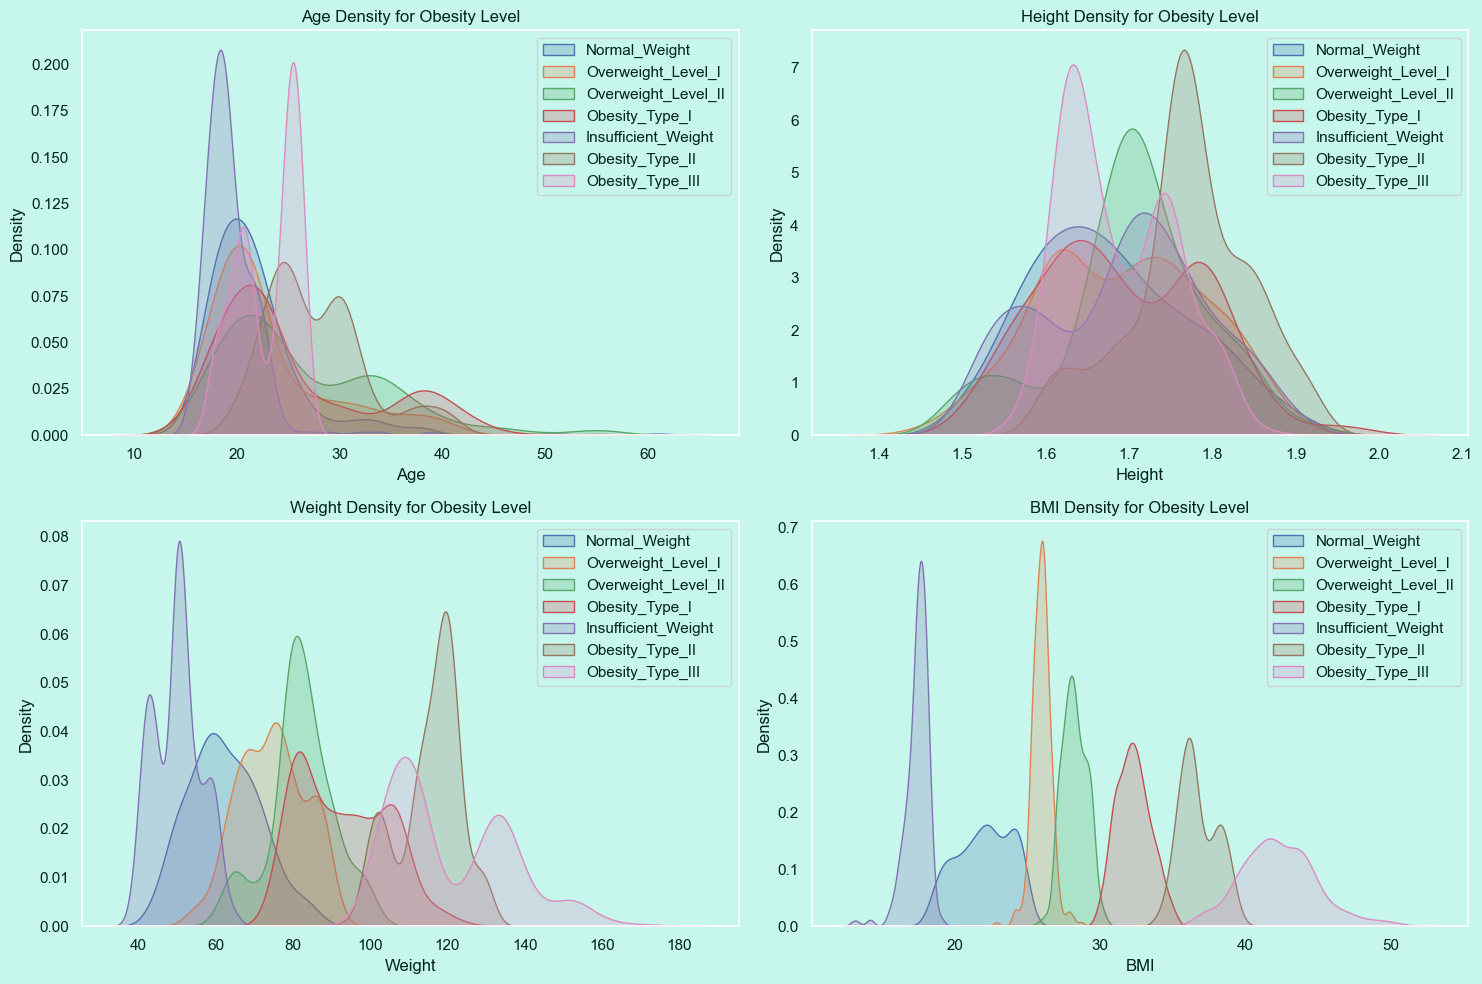

In [23]:
plot_numerical_features_target(df_visu)

It's interesting to analyze the behavior of obesity classifications in relation to BMI. Although they have well-defined ranges, there are small intervals of BMI values where classes overlap, highlighting the concept of body composition. This illustrates how two individuals with the same height and weight (and consequently the same BMI) can have distinct body compositions, leading to different classifications in weight indices.s

## NObeyesdad x Categorical Features

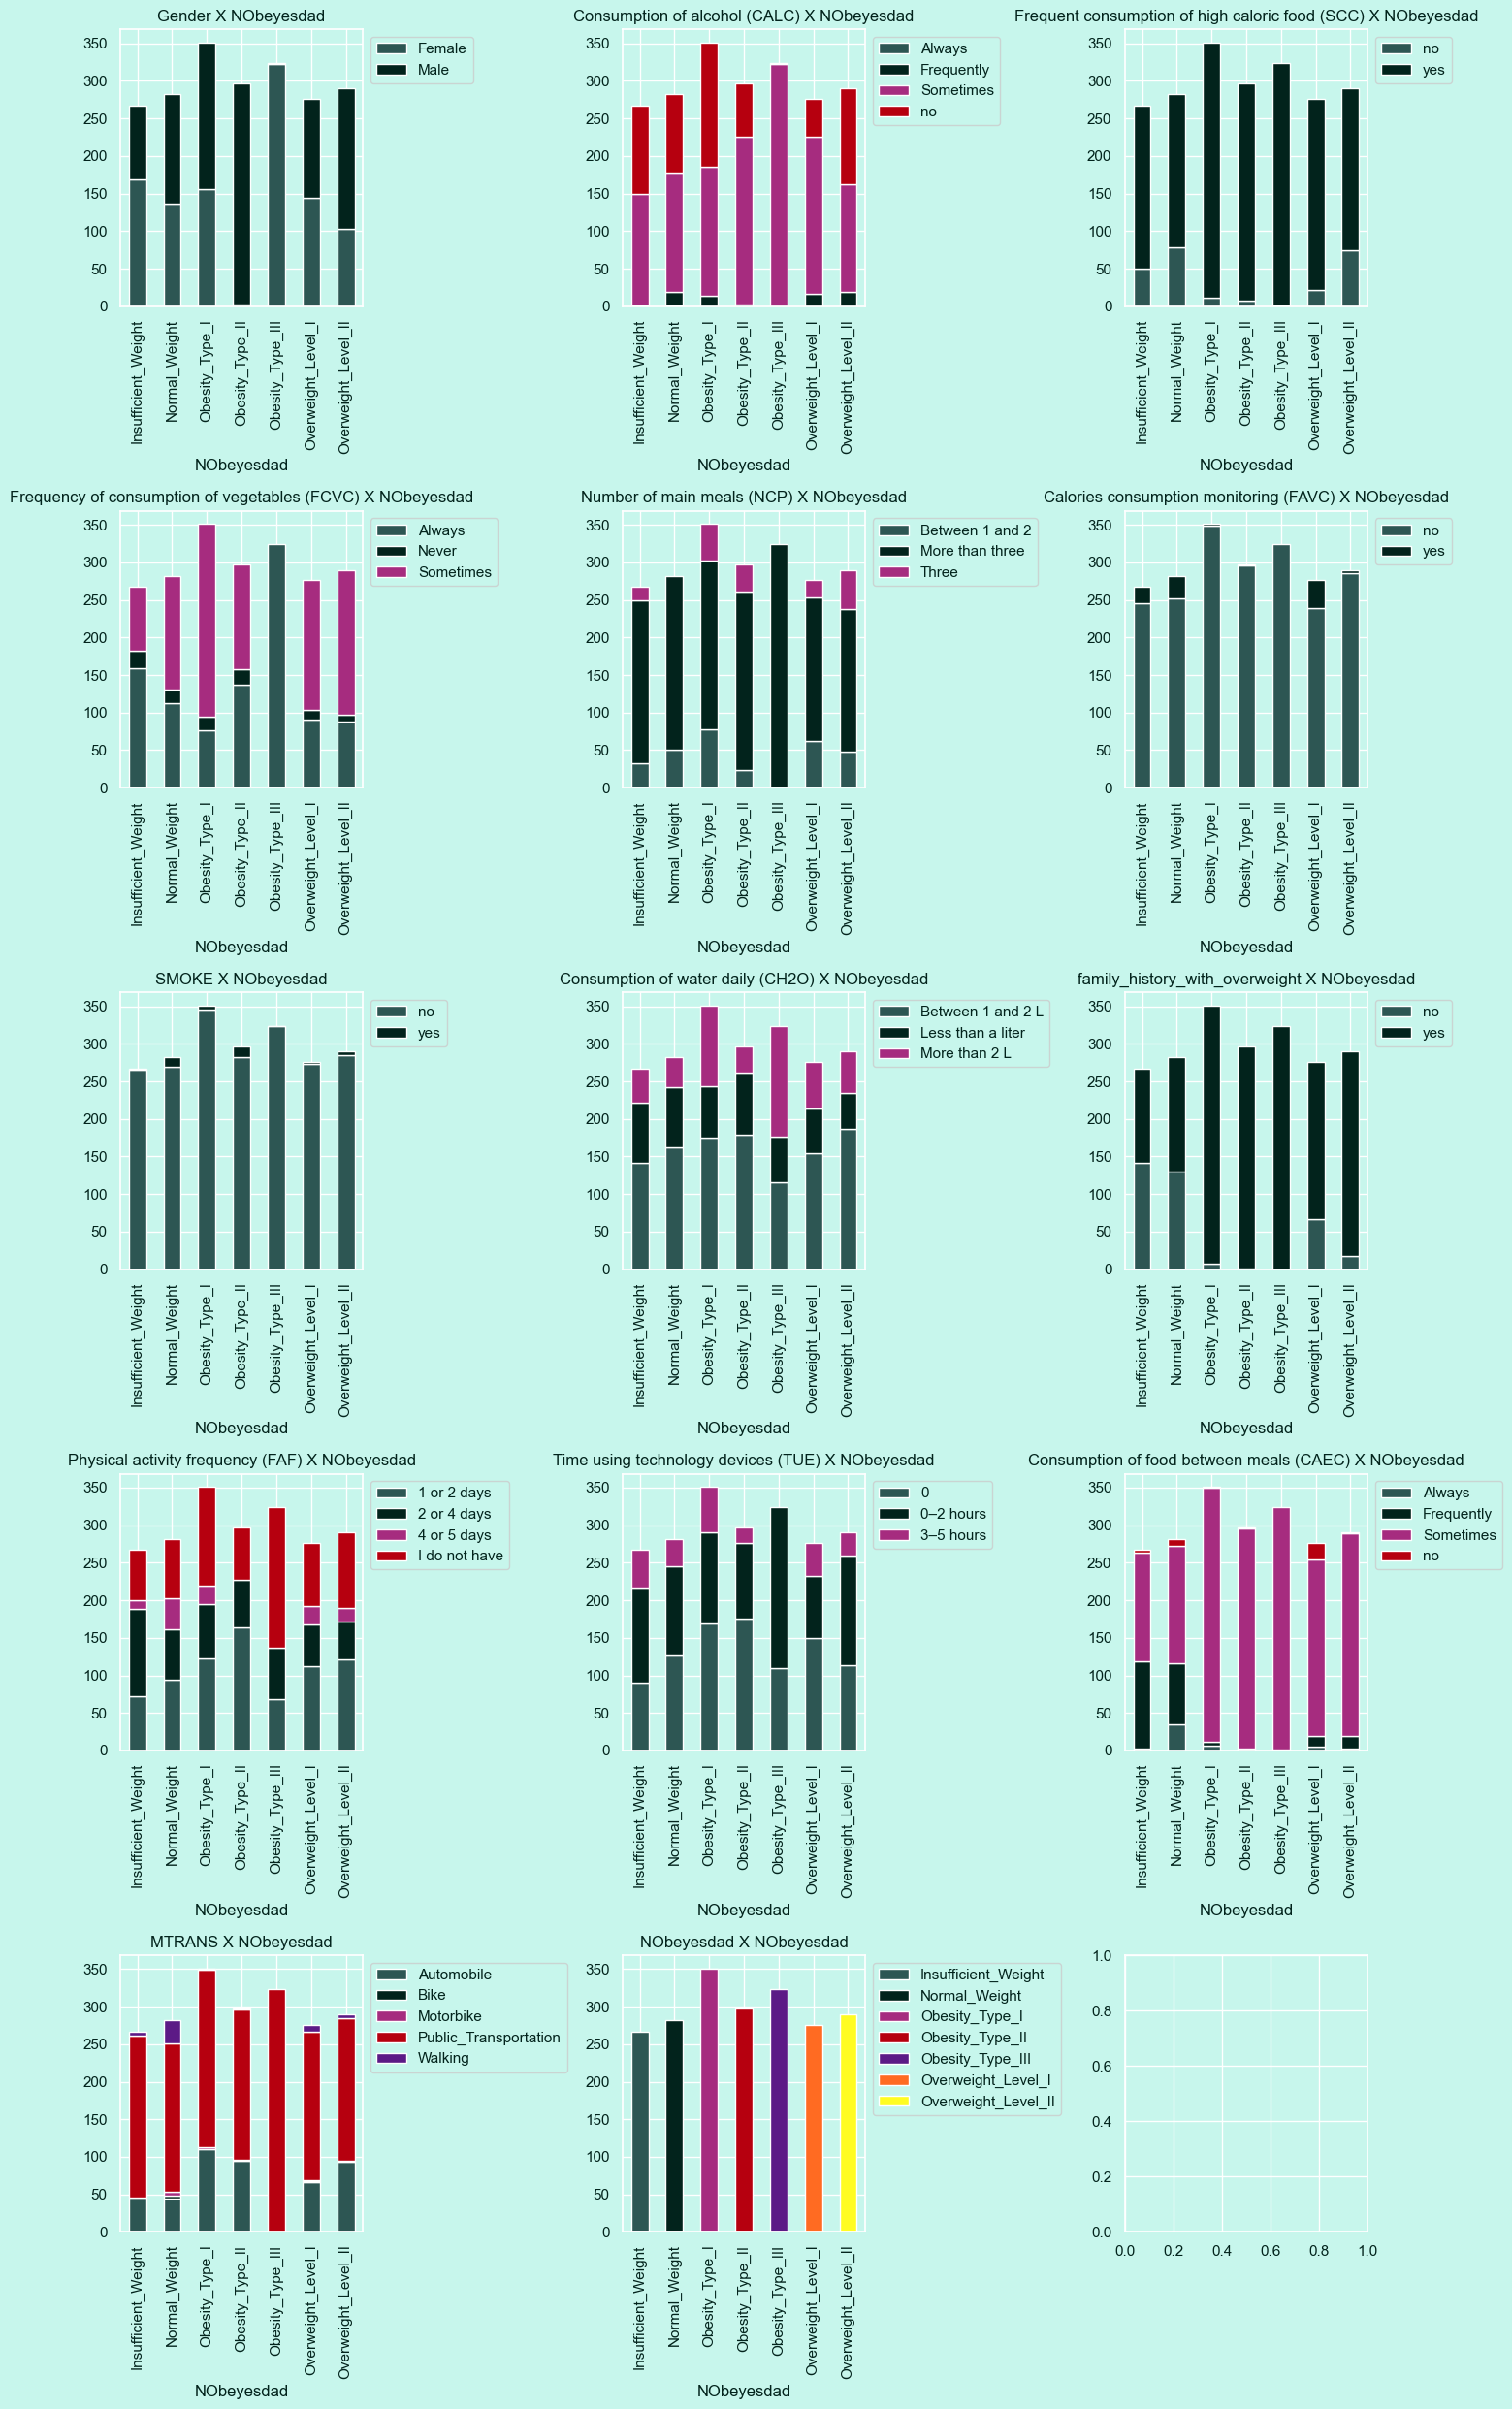

In [24]:
colors_2 = ["#2D5653", "#02231C", "#a62c7f","#b6000f", "#5c1a86","#ff6b22","#fffc22"]

plot_categorical_features_target(df_visu, color_palette=colors_2)

We can observe some points in these graphs:

Obesity_Type_III is almost always composed of only one class of each feature.

Obesity_Type_II is exclusively composed of men, and Obesity_Type_III exclusively of woeatures:

## Correlation Between Features

I will convert the categorical variables into dummy variables to check the correlation between the features:

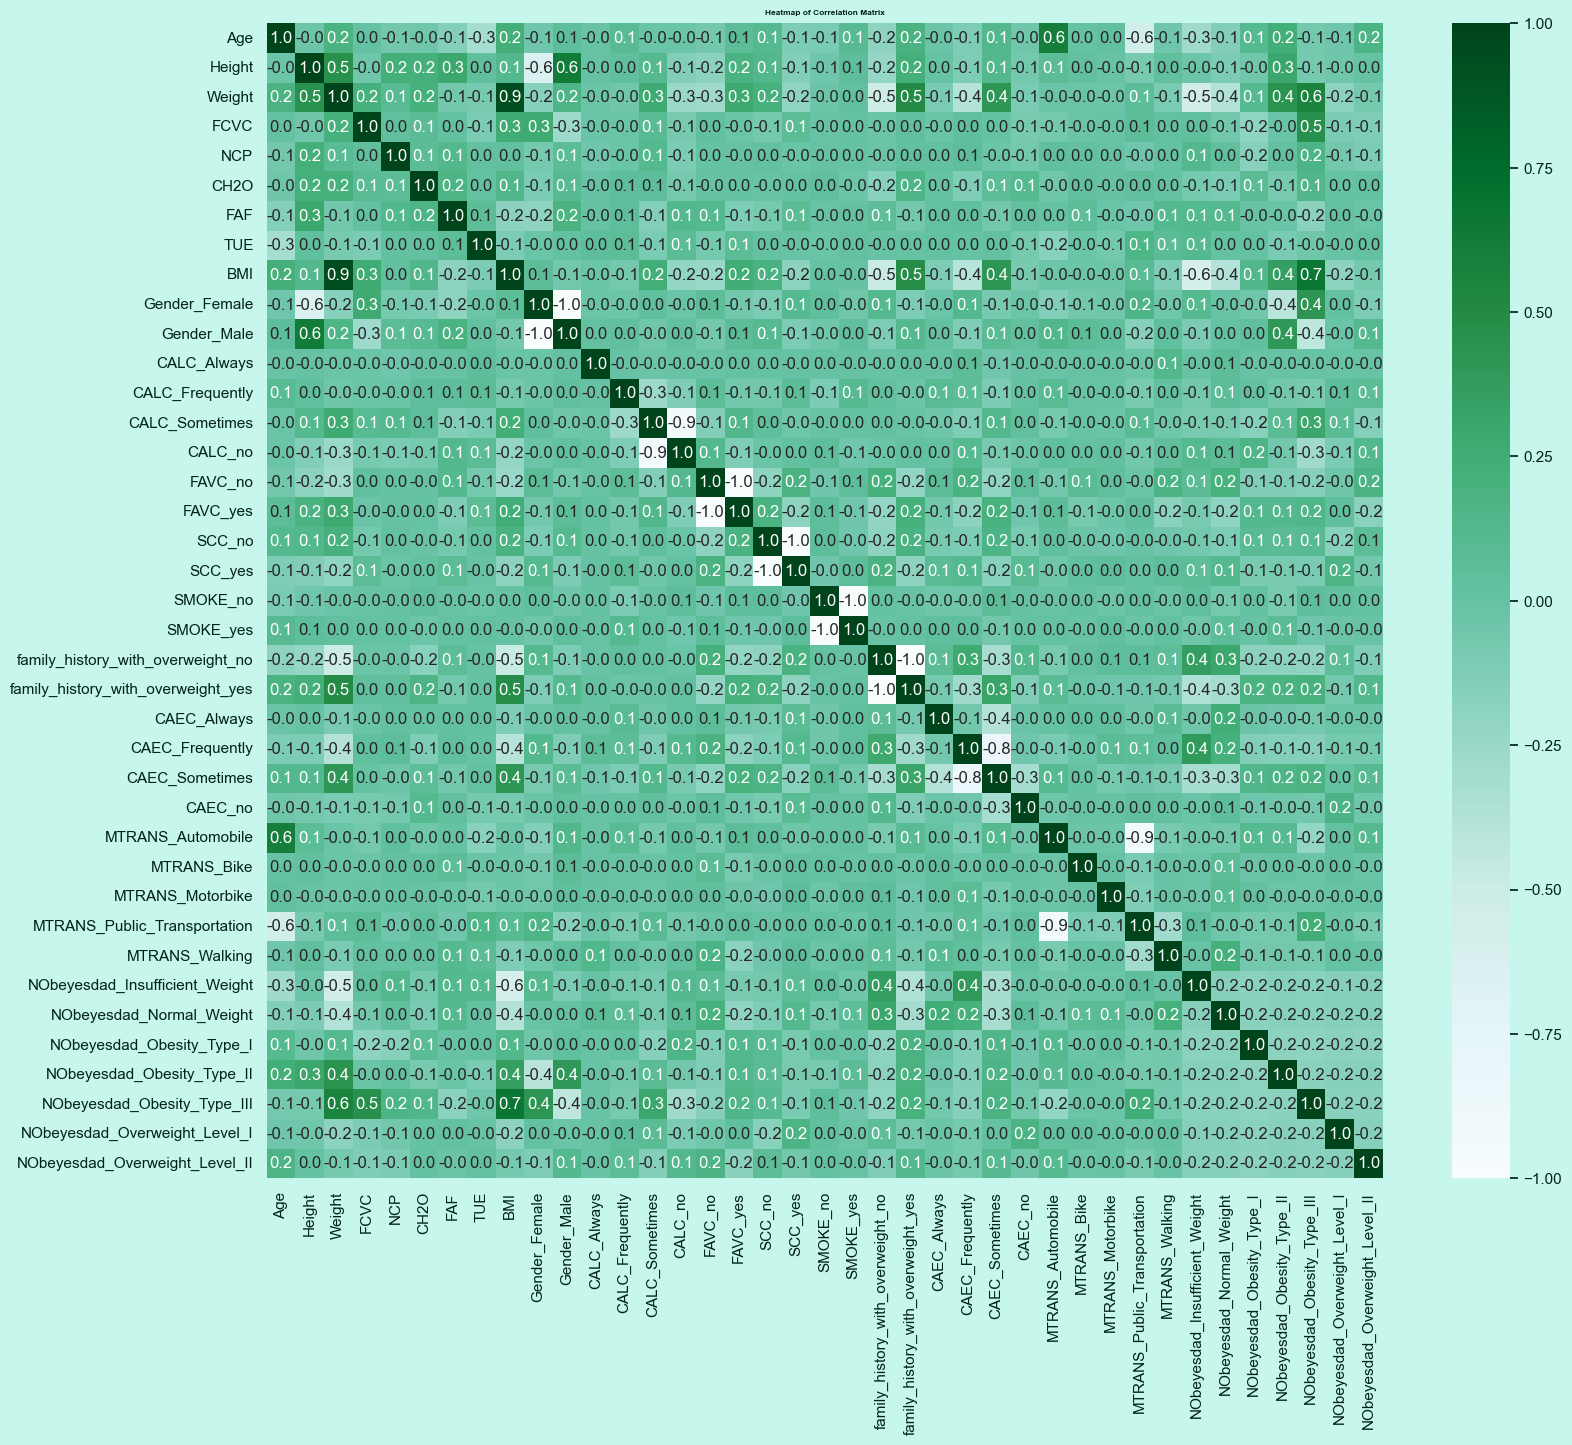

In [25]:
# Creating Dummy Columns 
df_dummies = pd.get_dummies(df)

# Calculating correlation matrix 
correlation_matrix = df_dummies.corr()

# Plotting heatmap 
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".1f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=6)
plt.show()

## DATA PREPROCESSING

Now, I'll implement One-Hot Encoding to convert the categorical variables into binary columns, enhancing data processing for the model.

In [26]:
# Selecting categorical features
categorical_features = df.select_dtypes(exclude="number").columns
categorical_features

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [27]:
# Reset the index
df.reset_index(inplace=True)

# Rename the index column to "ID"
df.rename(columns={'index': 'ID'}, inplace=True)

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns except the Target column
one_hot_cols = categorical_features[:-1]

# Selecting only categorical columns from the DataFrame
df_categorical = df[one_hot_cols]

# Applying OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

# Obtaining names of the features generated by OneHotEncoder
one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)

# Creating a DataFrame with transformed features
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

# Joining DataFrames
df_final = pd.concat([df, df_encoded], axis=1)

# Dropping categorical columns
df_final.drop(columns=one_hot_cols, inplace=True)
df_final.drop('ID', axis=1, inplace=True)

# Visualizing the first few rows of the final DataFrame
df_final.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,...,family_history_with_overweight_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,24.39,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,24.24,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,23.77,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,26.85,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,28.34,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## TRAINING MODEL

The next step is to separate the target feature from the rest of the dataframe to train and test the models.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

# Features
X = df_final.drop('NObeyesdad', axis=1)

# Target variable 
y = df_final['NObeyesdad']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import recall_score, accuracy_score, precision_score



models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LGBMClassifier": LGBMClassifier(verbose=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions, average='weighted')  
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

Model: RandomForestClassifier
Recall: 0.9760765550239234
Accuracy: 0.9760765550239234
Precision: 0.9768224382086544
--------------------------------------------------
Model: LGBMClassifier
Recall: 0.9784688995215312
Accuracy: 0.9784688995215312
Precision: 0.9794222289578327
--------------------------------------------------
Model: DecisionTreeClassifier
Recall: 0.9593301435406698
Accuracy: 0.9593301435406698
Precision: 0.9601375294957175
--------------------------------------------------
Model: ExtraTreesClassifier
Recall: 0.9449760765550239
Accuracy: 0.9449760765550239
Precision: 0.9467960835232612
--------------------------------------------------


## MODEL SELECTION

The models with the best performance are RandomForestClassifier and LGBMClassifier, achieving a score of 0.97 in Recall, Accuracy, and Precision.

Finally, I will plot the confusion matrices and the ROC curves to reinforce the selection of the model that has the best resuMatrix

## Confusion Matrix

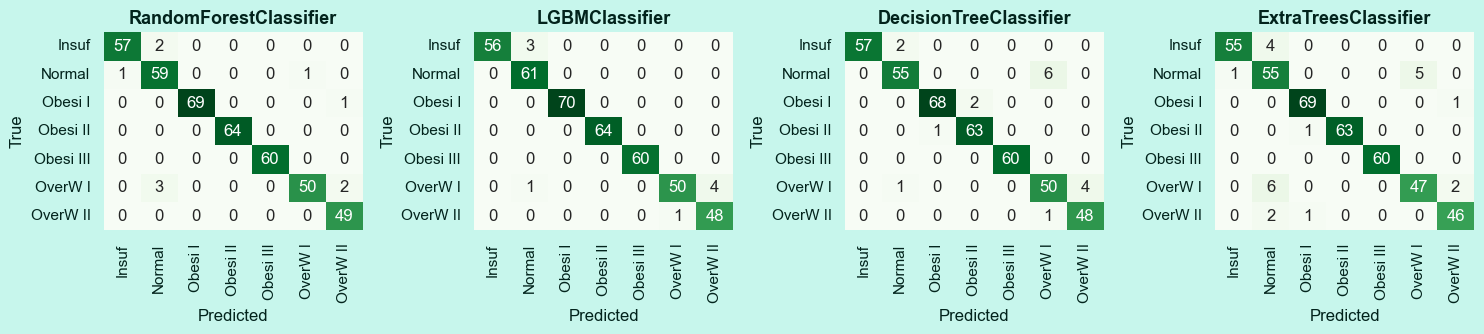

In [31]:
# Define the class labels
class_labels = ['Insuf', 'Normal', 'Obesi I', 'Obesi II', 'Obesi III', 'OverW I', 'OverW II']

# Create figure and axes
fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

# Plot confusion matrix for each model
for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=ax, 
                xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Adjust layout and show figure
plt.tight_layout()
plt.show()

By examining the confusion matrix above, we can further confirm the excellent classification performance of all models, with a slight highlight for the RandomForestClassifier and LGBMClassifier models.

Another point to highlight when comparing the confusion matrices of the two models with the best performance is that the misclassifications of the LGBMClassifier are more concentrated, appearing in 4 cells, while those of the RandomForestClassifier are slightly more scattered, appearing in 6 cellproblem.



## Roc Curve One-Vs-Rest

The ROC Curve is a graph that displays the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification threshold values. It is used to evaluate the performance of binary classification models. The closer the curve approaches the upper-left corner of the graph, the better the model's performance in distinguishing between positive and negative classes.

On the other hand, the ROC One vs Rest is a technique used in multiclass classification problems. Instead of comparing a specific class with all other classes (as in the traditional ROC Curve), it compares a specific class with all other combined classes.

For instance, if we were to analyze the ROC one vs all for the "Obesity_Type_I" class, we would be comparing the examples from the "Obesity_Type_I" class with examples from all other combined classes: "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_II" and "Obesity_Type_III". This helps us evaluate the model's performance in distinguishing the "Obesity_Type_I" class from the rest of the classes in the multiclass classification problem.

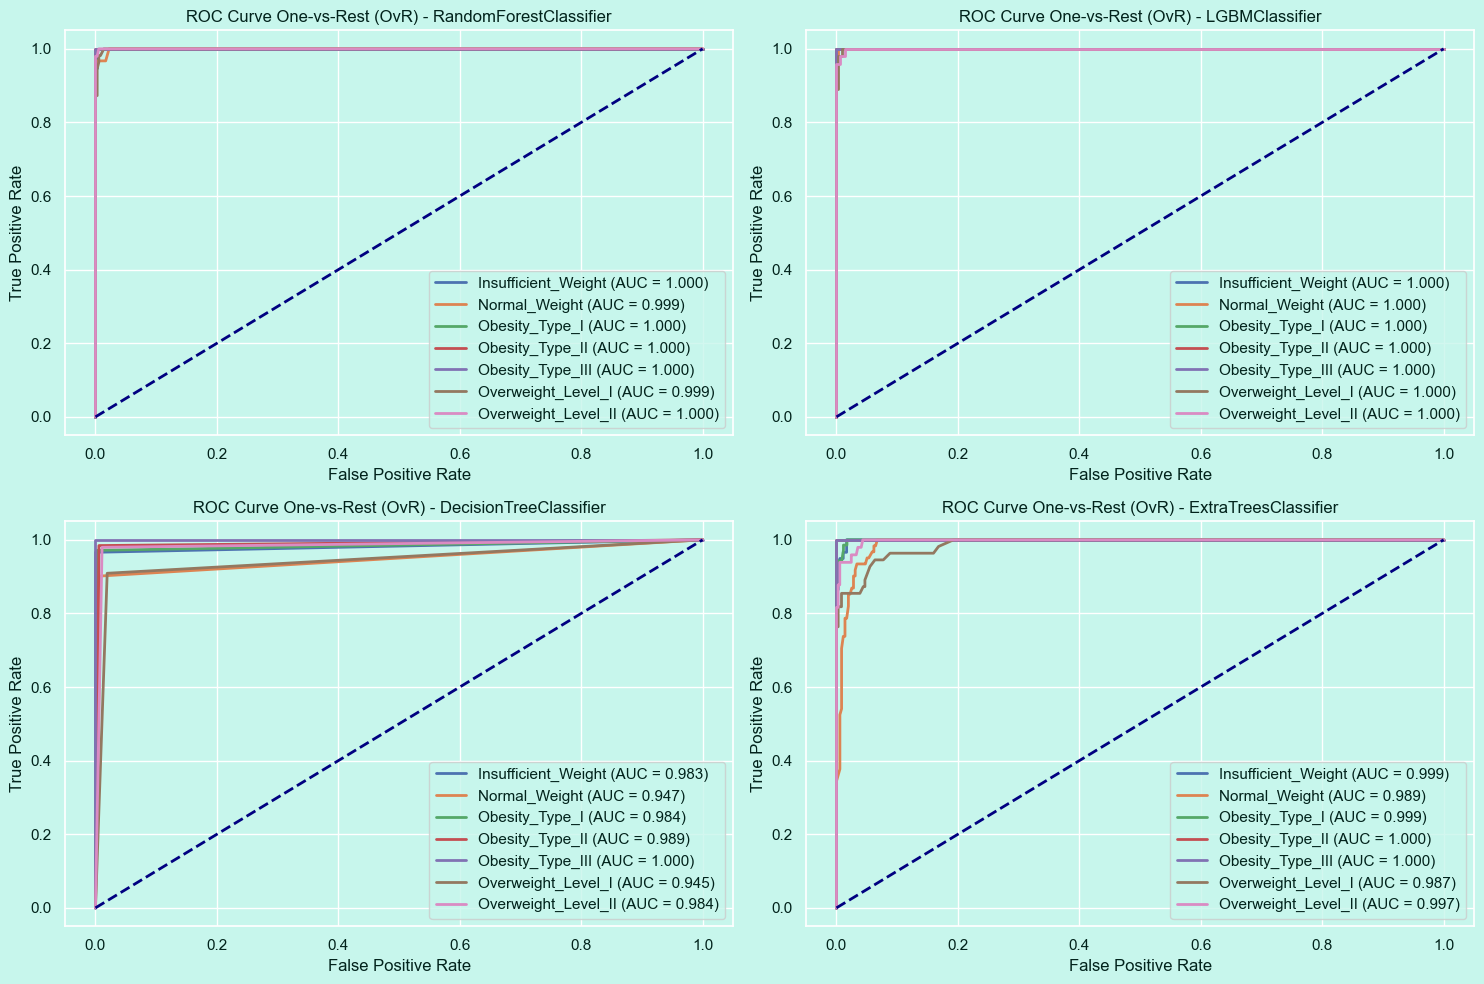

In [32]:
from sklearn.metrics import roc_curve, auc


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Loop over each model and plot its ROC curve in a separate subplot
for idx, (model_name, model) in enumerate(models.items()):
    y_pred_prob = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        axs[idx // 2, idx % 2].plot(fpr[i], tpr[i], lw=2, label=f'{model.classes_[i]} (AUC = {roc_auc[i]:.3f})')
    axs[idx // 2, idx % 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[idx // 2, idx % 2].set_xlabel('False Positive Rate')
    axs[idx // 2, idx % 2].set_ylabel('True Positive Rate')
    axs[idx // 2, idx % 2].set_title(f'ROC Curve One-vs-Rest (OvR) - {model_name}')
    axs[idx // 2, idx % 2].legend(loc='best')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

Upon analyzing the results of the One-vs-Rest ROC curve, we can draw the following conclusions:

All models performed exceptionally well, with the LGBMClassifier and RandomForestClassifier standing out as the top performers once again.

The LGBMClassifier model holds a slight advantage over the RandomForestClassifier.